In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = pd.read_csv("Train.csv")

Размерность датафрейма

In [5]:
data.shape

(7000, 24)

<ipython-input-6-9d0e9a101309>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)


<Axes: >

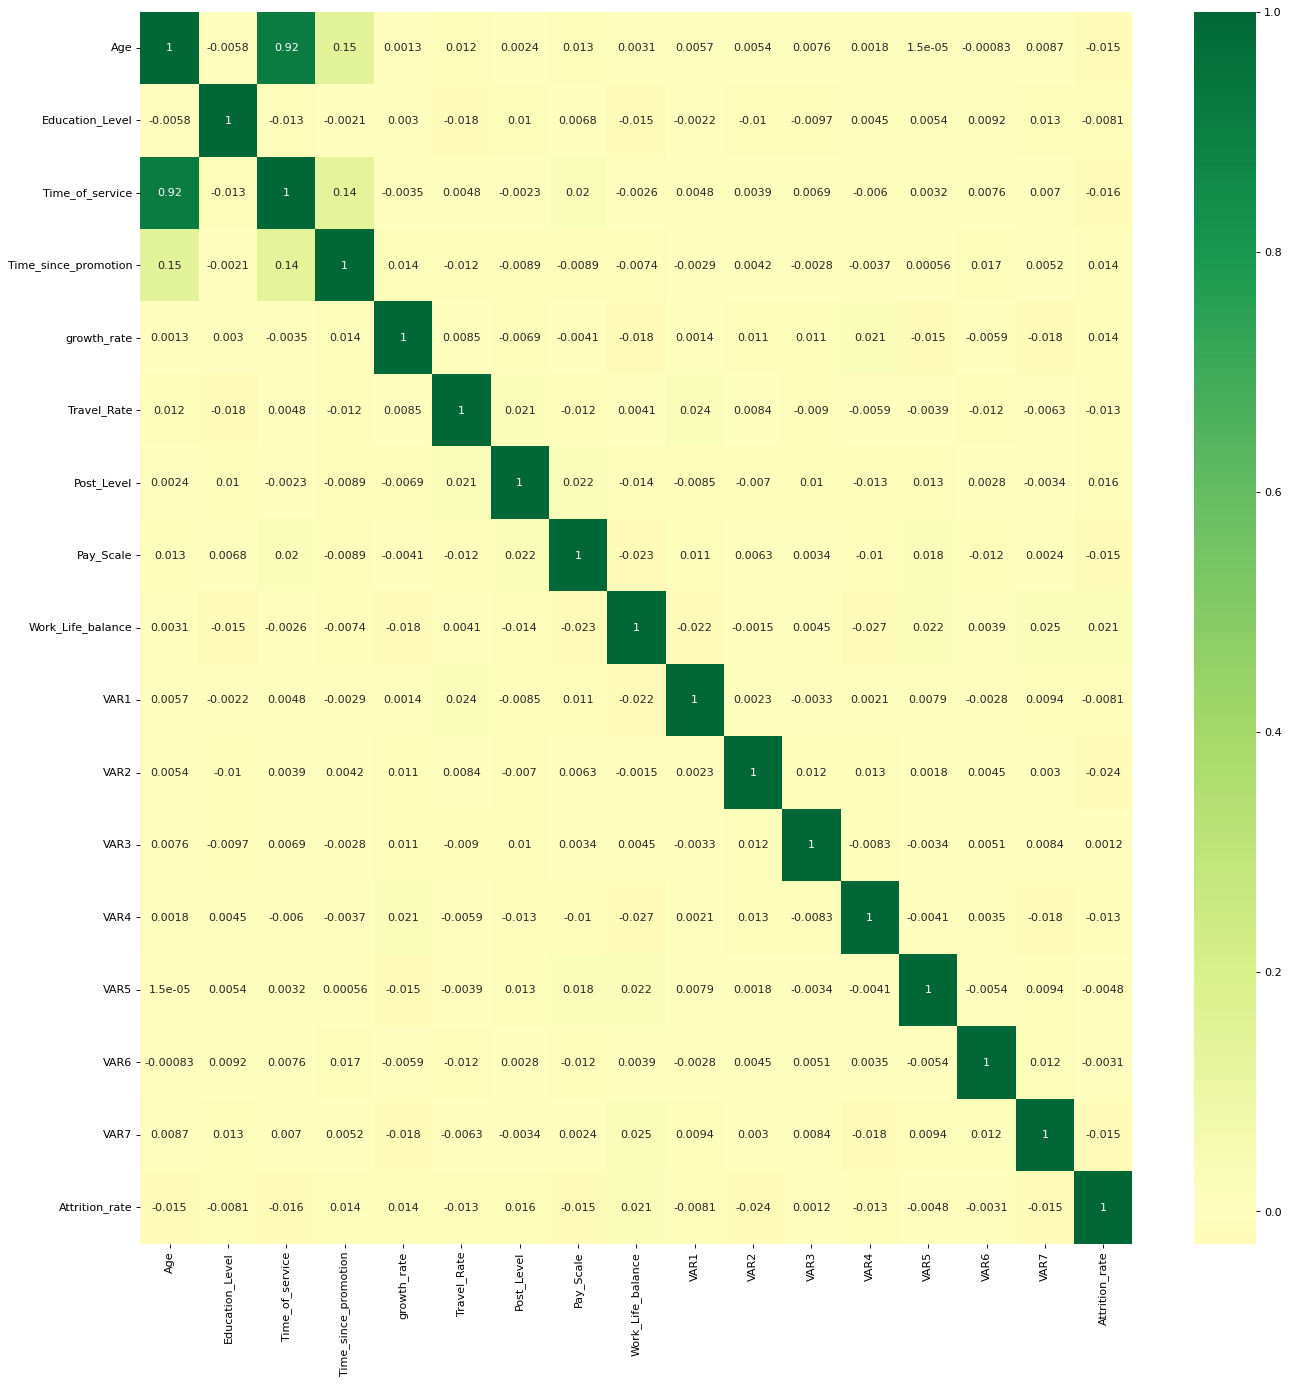

In [6]:
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

Корелляции между признаками и целовой переменной очень малы, следовательно нет линейной зависимости

<Axes: >

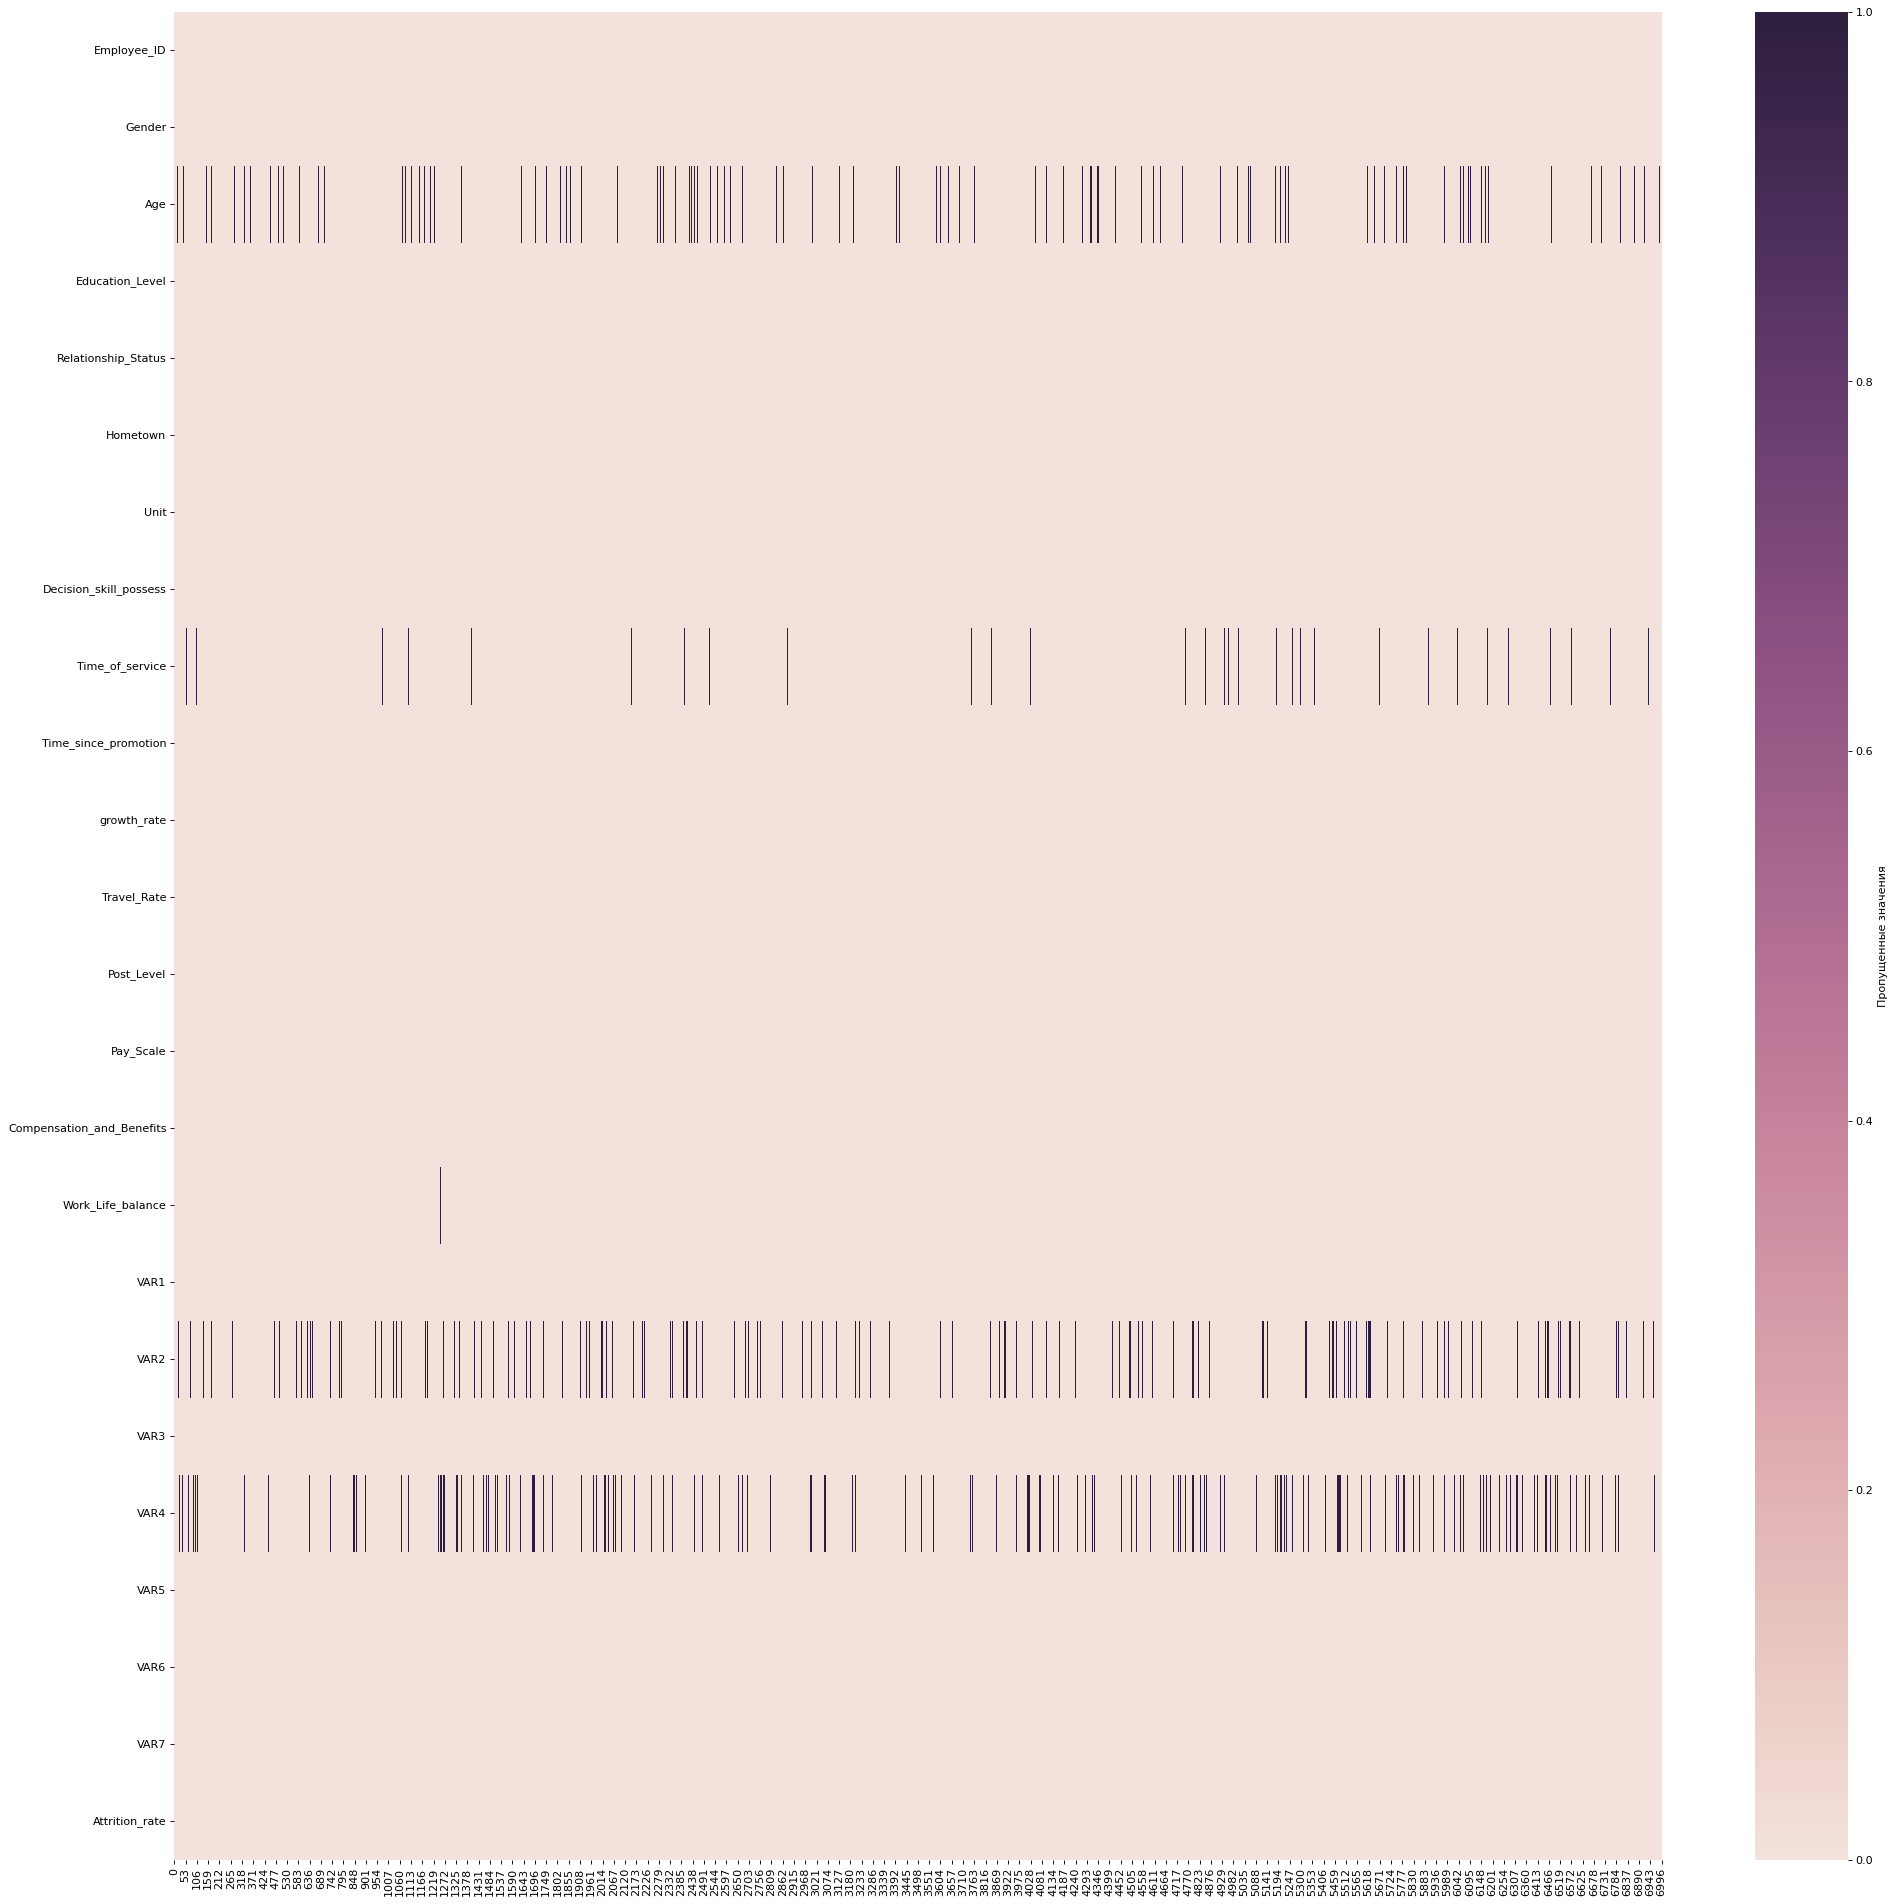

In [7]:
plt.figure(figsize=(30,30), dpi= 80)
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(data.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Пропущенные значения'})

Пропуски присутствуют в столбцах признаков Age, Work_Life_balance, VAR2, VAR4 (и payscale ???), но они составляют меньше половины, поэтому эти столбцы достаточно информативны и удалять их не стоит

In [8]:
data = data.dropna(subset=['Age', 'Time_of_service', 'VAR2', 'VAR4', 'Work_Life_balance', 'Pay_Scale'])

<Axes: ylabel='VAR7'>

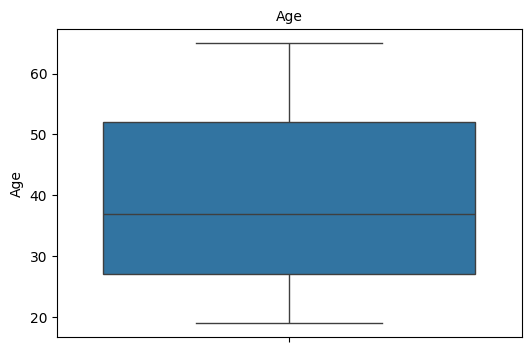

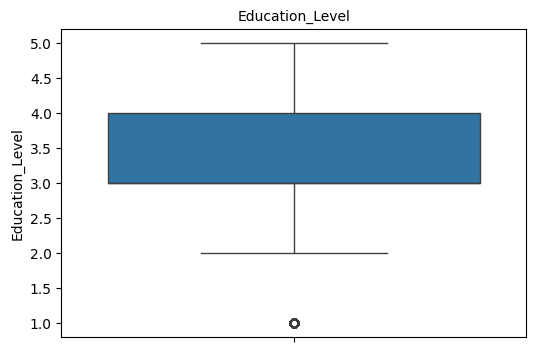

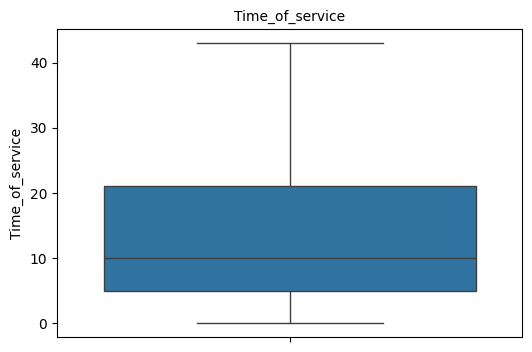

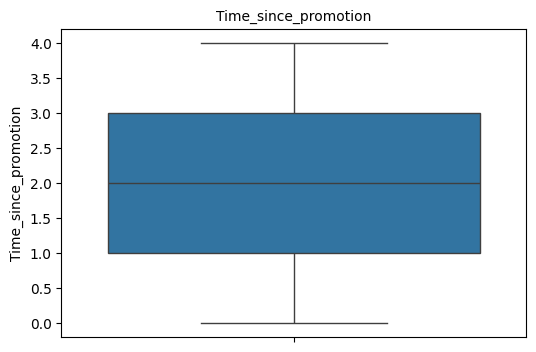

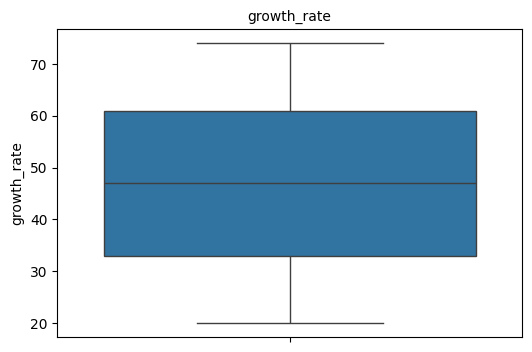

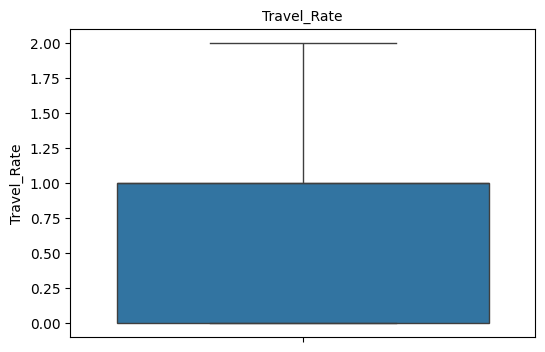

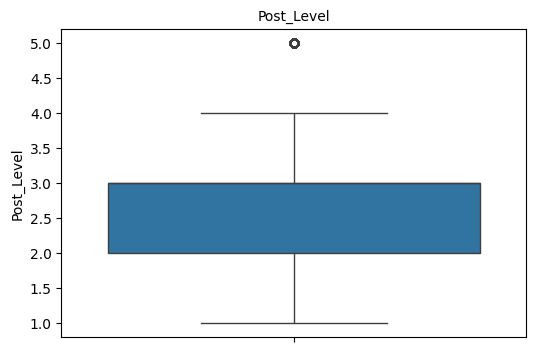

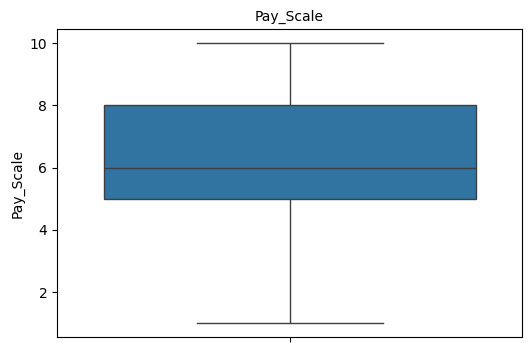

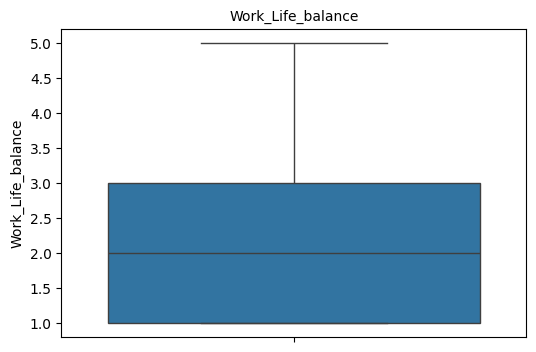

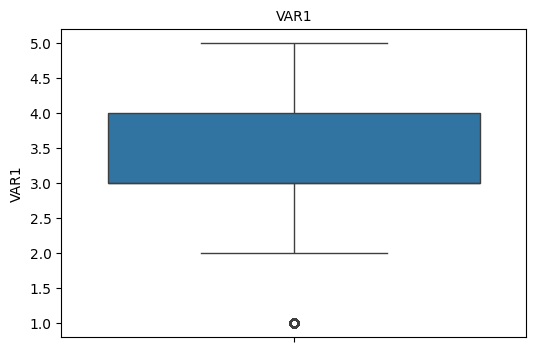

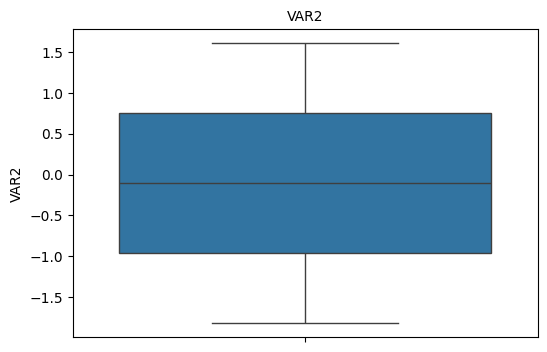

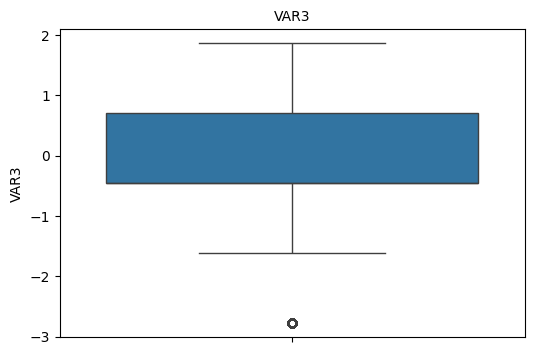

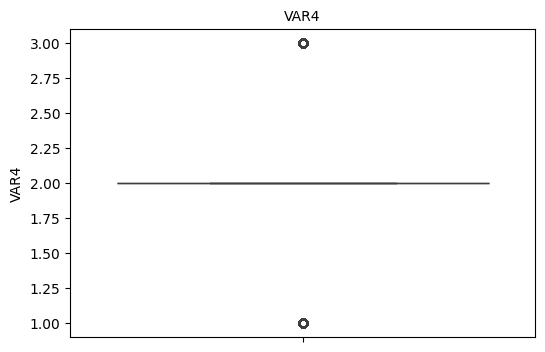

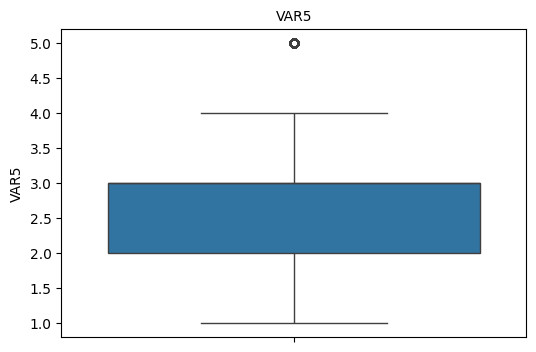

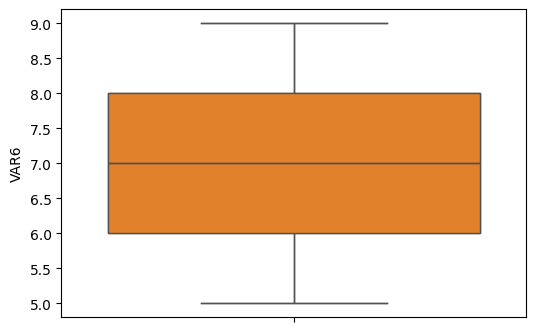

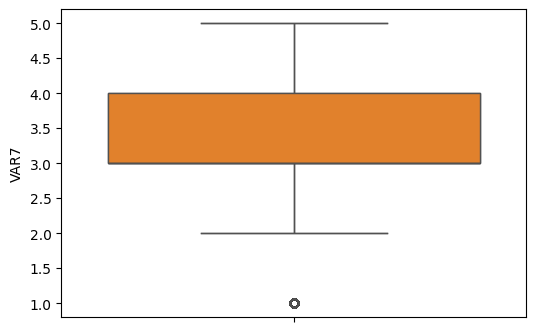

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(data["Age"])
plt.title("Age", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["Education_Level"])
plt.title("Education_Level", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["Time_of_service"])
plt.title("Time_of_service", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["Time_since_promotion"])
plt.title("Time_since_promotion", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["growth_rate"])
plt.title("growth_rate", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["Travel_Rate"])
plt.title("Travel_Rate", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["Post_Level"])
plt.title("Post_Level", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["Pay_Scale"])
plt.title("Pay_Scale", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["Work_Life_balance"])
plt.title("Work_Life_balance", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["VAR1"])
plt.title("VAR1", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["VAR2"])
plt.title("VAR2", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["VAR3"])
plt.title("VAR3", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["VAR4"])
plt.title("VAR4", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["VAR5"])
plt.title("VAR5", fontsize=10)
plt.figure(figsize=(6, 4))
sns.boxplot(data["VAR6"])
sns.boxplot(data["VAR6"])
plt.figure(figsize=(6, 4))
sns.boxplot(data["VAR7"])
sns.boxplot(data["VAR7"])

Выбросы присутствуют в столбцах Education_Level, Post_Level, VAR1, VAR3, VAR5, VAR7

In [10]:
datax = data.drop(columns=['Attrition_rate'], axis=1).select_dtypes(include="number")
datay = data['Attrition_rate']

datax_train, datax_test, datay_train, datay_test = train_test_split(datax, datay, test_size=0.3)




model = LinearRegression()
model.fit(datax_train, datay_train)

w0 = model.intercept_
w1 = model.coef_
print(w0)
print(w1)

0.18779964003160018
[ 3.51059737e-04 -1.77768784e-03 -7.11470356e-04  1.82193303e-03
 -5.13211766e-06  6.29285499e-04  4.48620313e-03 -8.43202886e-04
  8.48669351e-03 -3.50111538e-03 -1.13630895e-03 -2.15430062e-03
 -7.18187990e-03 -3.88434912e-03  1.53659931e-03 -8.64262286e-04]


y = 0.00058992 * x -0.00215705 * x^2 - 0.0009122 * x^3 + 0.00583077 * x^4 -0.00025726 * x^5 + 0.00309785 * x^6 + 0.00125353 * x^7 - 0.00102355 * x^8 + 0.00291322 * x^9 - 0.00344911 * x^10 - 0.00232142 * x^11 - 0.00293841 * x^12 - 0.00422424 * x^13 - 0.0042971 * x^14 + 0.00152576 * x^15 - 0.00307906 * x^16 + 0.2058904048429752

Весы малы, нельзя выделить наиболее влияющий признак

In [11]:
pred = model.predict(datax_test)

print("")
print("")
print("БЕЗ МАСШТАБИРОВАНИЯ")
print('Mean Absolute Error:', mean_absolute_error(datay_test, pred))
print('Mean Squared Error:', mean_squared_error(datay_test, pred))
print('R2 score:', r2_score(datay_test, pred))

std = StandardScaler()
datax_train_std = std.fit_transform(datax_train)
datax_test_std = std.fit_transform(datax_test)

model2 = LinearRegression()
model2.fit(datax_train_std, datay_train)
pred2 = model2.predict(datax_test_std)

print("")
print("")
print("СО СТАНДАРТИЗАЦИЕЙ")
print('Mean Absolute Error:', mean_absolute_error(datay_test, pred2))
print('Mean Squared Error:', mean_squared_error(datay_test, pred2))
print('R2 score:', r2_score(datay_test, pred2))


norm = MinMaxScaler()
datax_train_norm = norm.fit_transform(datax_train)
datax_test_norm = norm.fit_transform(datax_test)

model3 = LinearRegression()
model3.fit(datax_train_norm, datay_train)
pred3 = model3.predict(datax_test_norm)

print("")
print("")
print("С НОРМАЛИЗАЦИЕЙ")
print('Mean Absolute Error:', mean_absolute_error(datay_test, pred3))
print('Mean Squared Error:', mean_squared_error(datay_test, pred3))
print('R2 score:', r2_score(datay_test, pred3))




БЕЗ МАСШТАБИРОВАНИЯ
Mean Absolute Error: 0.12031929759160333
Mean Squared Error: 0.031060872343457564
R2 score: -0.012873860789098579


СО СТАНДАРТИЗАЦИЕЙ
Mean Absolute Error: 0.1203558966156641
Mean Squared Error: 0.031069258294890587
R2 score: -0.013147320945350094


С НОРМАЛИЗАЦИЕЙ
Mean Absolute Error: 0.12031929759160334
Mean Squared Error: 0.031060872343457564
R2 score: -0.012873860789098579


Среднее абсолютное отклонение и Среднеквадратичное отклонение показывают хороший результат. Коэффициент детерминации R2 меньше 0, следовательно модель работает ошибочно. Причина: мы использовали алгоритм линейной регрессии, при том, что в датафрейме отсутствует линейная зависимость целевой переменной от признаков